# Monochrometer Optimization

Bespoke plans that perform high-level tasks like "Align my monochrometer optics," can be easily built out of bluesky's built-in plans, and they greatly improve the user experience.

In this notebook you will:

* Use a custom plan that is tuned to a specific, common task at an XAFS beamline.
* This plan will take some readings, do some prompt analysis on those readings, and then immediately take an action based on the result.

## Science Background

Here is a schematic of a double crystal monochromator (DCM).  At BMM, the broadband radiation from the 3-pole wiggler source is incident upon the first crystal of the DCM.  The energy of the X-rays transmitted through the DCM is determined by Bragg diffraction, thus by the angle of the first crystal relative to the incident beam.  The second crystal is used to direct the monochromatic beam towards the downstream direction. To optimize the flux of transmitted beam, the second crystal must be parallel to the first crystal.  We perform this optimization by scanning the pitch of the second crystal and monitoring the intensity of the beam entering the experimental hutch.

![DCM](./static/doubleb.gif)

[(image source)](http://pd.chem.ucl.ac.uk/pdnn/inst2/condit.htm)

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from bluesky import RunEngine
from bluesky_tutorial_utils import setup_data_saving


RE = RunEngine()
catalog = setup_data_saving(RE)

We will import a Bluesky *plan* from a script in the current directory, [plans.py](./plans.py). The plan operates on simulated hardware defined in another script, [simulated_hardware.py](./simulated_hardware.py). For the purposes of this tutorial we do not need to interact with the hardware directly; it's all done through the plan.

In [2]:
from plans import rocking_curve

help(rocking_curve)

Help on function rocking_curve in module plans:

rocking_curve(start=-0.1, stop=0.1, nsteps=101, choice='peak')
    Perform a relative scan of the DCM 2nd crystal pitch around the current
    position to find the peak of the crystal rocking curve.  Begin by opening
    the hutch slits to 3 mm. At the end, move to the position of maximum
    intensity on I0, then return to the hutch slits to their original height.
    Input:
      start:    (float)  starting position relative to current  [-0.1]
      end:      (float)  ending position relative to current    [0.1]
      nsteps:   (int)    number of steps                        [101]
      choice:   (string) 'peak', fit' or 'com' (center of mass) ['peak']
    If choice is fit, the fit is performed using the
    SkewedGaussianModel from lmfit, which works pretty well for this
    measurement at BMM.  The line shape is a bit skewed due to the
    convolution with the slightly misaligned entrance slits.



In [3]:
RE(rocking_curve())

rocking curve scan: pitch, I0, -0.100, 0.100, 101 -- starting at 4.000
	uid = e5bd1a97-3dfb-46a0-9eee-b8344498c040, scan_id = 1
Found peak at 4.04 via method peak


('e5bd1a97-3dfb-46a0-9eee-b8344498c040',)

In [4]:
plt.gcf()  # Display a snapshot of the current state of the figure.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

In [5]:
run = catalog[-1]
run

BlueskyRun
  uid='e5bd1a97-3dfb-46a0-9eee-b8344498c040'
  exit_status='success'
  2020-05-08 19:23:26.925 -- 2020-05-08 19:23:27.150
  Streams:
    * primary


Access the saved data.

In [6]:
data = run.primary.read()
data

<xarray.Dataset>
Dimensions:                   (time: 101)
Coordinates:
  * time                      (time) float64 1.589e+09 1.589e+09 ... 1.589e+09
Data variables:
    pitch                     (time) float64 3.9 3.902 3.904 ... 4.096 4.098 4.1
    pitch_setpoint            (time) float64 3.9 3.902 3.904 ... 4.096 4.098 4.1
    I0                        (time) float64 0.001037 0.001037 ... 0.5701 0.4802
    pitch:pitch_velocity      (time) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    pitch:pitch_acceleration  (time) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    I0:I0                     (time) float64 0.001037 0.001037 ... 0.001037
    seq_num                   (time) int64 1 2 3 4 5 6 7 ... 96 97 98 99 100 101
    uid                       (time) <U36 '132be2f8-cdcd-4be7-8406-47d9ff6244c0' ... '2b025204-5d3e-453c-9b51-397af7cbb562'

Plot I0 vs pitch.

In [7]:
plt.figure()  # New figure

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

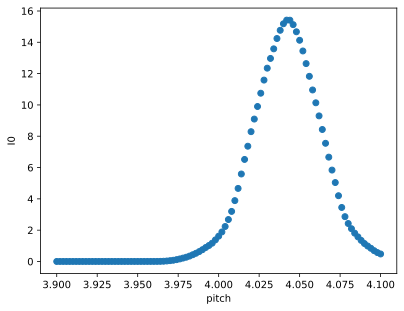

In [8]:
data.plot.scatter("pitch", "I0")
plt.gcf()  # Display a snapshot of the current state of the figure.

We could have gone straight to the plot in one line by chaining all of this together.

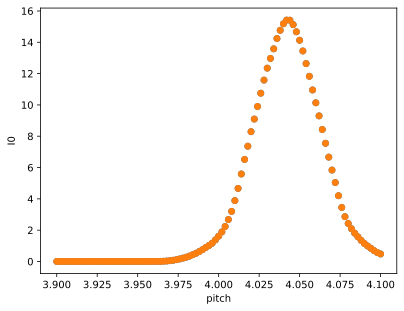

In [9]:
catalog[-1].primary.read().plot.scatter("pitch", "I0")
plt.gcf()  # Display a snapshot of the current state of the figure.